<a href="https://colab.research.google.com/github/raheeltahir55/CE888/blob/main/Lab6/Lab_6_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [85]:
data= pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')

In [86]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [87]:
features= data.columns[1:]
X= data[features]

In [88]:
k_means= cluster.KMeans(n_clusters= 3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [89]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

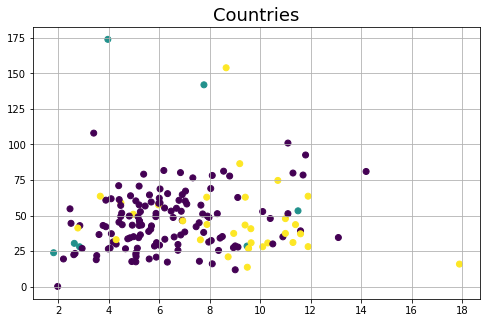

In [90]:
plt.figure(figsize=(8,5))
plt.title("Countries", fontsize=18)
plt.grid(True)
plt.scatter(X.iloc[:,2],X.iloc[:,3], c=k_means.labels_)
plt.savefig('Countries.png', dpi=300)
plt.show()

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc= sc.fit_transform(X)

In [92]:
print(X_sc)

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 4)
X_pca = pca.fit_transform(X_sc)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162])

In [ ]:
# dbs = cluster.DBSCAN(eps=1.4) # The maximum distance between two samples for them to be considered as in the same neighborhood.
# dbs.fit(X_pca)
# dbs.labels_

In [95]:
k_means= cluster.KMeans(n_clusters= 3, random_state=1234)
k_means.fit(X_pca)
k_means.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

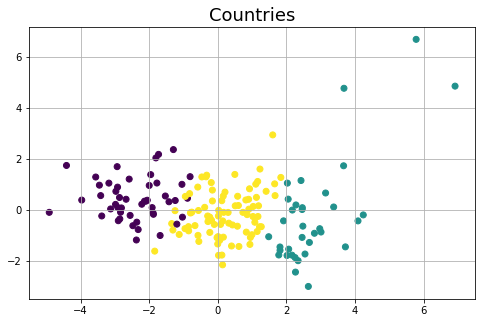

In [96]:
plt.figure(figsize=(8,5))
plt.title("Countries", fontsize=18)
plt.grid(True)
plt.scatter(X_pca[:,0],X_pca[:,1], c=k_means.labels_)
plt.savefig('Countries.png', dpi=300)
plt.show()

In [97]:
data['Category']= k_means.labels_

In [102]:
print(data.head(n= 25))

                   country  child_mort  exports  health  imports  income  \
0              Afghanistan        90.2     10.0    7.58     44.9    1610   
1                  Albania        16.6     28.0    6.55     48.6    9930   
2                  Algeria        27.3     38.4    4.17     31.4   12900   
3                   Angola       119.0     62.3    2.85     42.9    5900   
4      Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5                Argentina        14.5     18.9    8.10     16.0   18700   
6                  Armenia        18.1     20.8    4.40     45.3    6700   
7                Australia         4.8     19.8    8.73     20.9   41400   
8                  Austria         4.3     51.3   11.00     47.8   43200   
9               Azerbaijan        39.2     54.3    5.88     20.7   16000   
10                 Bahamas        13.8     35.0    7.89     43.7   22900   
11                 Bahrain         8.6     69.5    4.97     50.9   41100   
12          

In [99]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_pca, k_means.labels_))

Silhouette Coefficient: 0.334


In [100]:
data.loc[data['Category']==0, 'Country_Group']= 'Under Developing Country'
data.loc[data['Category']==2, 'Country_Group']= 'Developing Country'
data.loc[data['Category']==1, 'Country_Group']= 'Developed Country'

In [101]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Category,Country_Group
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Under Developing Country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,Developing Country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,Developing Country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Under Developing Country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,Developing Country


In [103]:
df_country= pd.DataFrame()

In [104]:
df_country['Country']= data['country']
df_country['Category']= data['Country_Group']

Data consist of some key indicators for each country that describes their position in terms of development, poverty and economy worldwide. Indicators as features are first normalized using standard scalar and then transfomed into 4 principal components using PCA. That reduces the dimensionality of features to 4 with first 2 components having highest explanied variance ratio. 4 components are used as it best divides the data into 3 required categories. K means clustering is used with k=3 to group the data into 3 clusters. 3 clusters would mean countries are grouped into 3 caetgories; under developing country, developing country, developed country. Category 0 refers to under developing country, 1 means developed country and 2 points to developing country. Data is well clustered as countries like Australia, Italy, USA, UK and Canada are categorized as developed countries. Paraguay, India, Morocco, China and Brazil are placed in developing country group. Countries like Afghanistan, Cameroon, Iraq, Pakistan, South Africa and Uganda are referred to as under developing countries.

In [83]:
print(df_country)

                            Country                  Category
0                       Afghanistan  Under Developing Country
1                           Albania        Developing Country
2                           Algeria        Developing Country
3                            Angola  Under Developing Country
4               Antigua and Barbuda        Developing Country
5                         Argentina        Developing Country
6                           Armenia        Developing Country
7                         Australia         Developed Country
8                           Austria         Developed Country
9                        Azerbaijan        Developing Country
10                          Bahamas        Developing Country
11                          Bahrain        Developing Country
12                       Bangladesh        Developing Country
13                         Barbados        Developing Country
14                          Belarus        Developing Country
15      